The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black
	 #Label  Mean 			 Median
Weak: 	 1012 	 0.7876496343873517 	 0.794046
No Weak: 18840 	 0.7760477765923567 	 0.786085
Differenz	 0.011601857794995007 	 0.007960999999999996


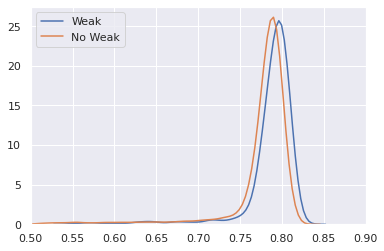

In [180]:
%load_ext lab_black
import pickle
from tabulate import tabulate
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns, numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

sns.set()
rug = False
bins = 50
# code refactoren und eine funktion drauß machen
# filterung der datentypen refactoren
# so filtern, dass nur die true weaks dabei sind, und davon auch nur die, welche vielversprechende parameterkombinationen enthalten
# bzw. dann auch mal false weaks beibehalten -> es ist keine Erfolgsgarantie!
# ---> Untersuchung, dass ich die Parameter für die Trennung der beiden Bereiche so lange ausprobiere, bis ich den perfekten Wertebereich der Parameter gefunden habe
# -> early Ergebnis an Maik senden


with open("200er_results.pickle", "rb") as f:
    table = pickle.load(f)

df = pd.DataFrame(table)


def compare_two_distributions(
    df, selection1, selection2, label1, label2, bins=50, rug=False, axvline=False
):
    ax1 = sns.kdeplot(
        selection1,
        label=label1,
        # rug=rug,
        # bins=bins,
    )

    ax1.set_xlim(0.5, 0.9)
    if axvline:
        ax1.axvline(selection1.mean())
    # plt.show()
    # plt.clf()

    ax2 = sns.kdeplot(
        selection2,
        label=label2,
        # rug=rug,
        # bins=bins,
    )
    ax2.set_xlim(0.5, 0.9)

    if axvline:
        ax2.axvline(selection2.mean())

    print("\t #Label  Mean \t\t\t Median")
    print(
        label1 + ": \t",
        len(selection1),
        "\t",
        selection1.mean(),
        "\t",
        selection1.median(),
    )
    print(
        label2 + ":",
        len(selection2),
        "\t",
        selection2.mean(),
        "\t",
        selection2.median(),
    )
    print(
        "Differenz\t",
        selection1.mean() - selection2.mean(),
        "\t",
        selection1.median() - selection2.median(),
    )

    plt.show()


compare_two_distributions(
    df,
    df.loc[df["interesting?"] == True]["acc_test"],
    df.loc[df["interesting?"] == False]["acc_test"],
    "Weak",
    "No Weak",
)


# display(HTML(tabulate(table, headers="keys", tablefmt="html")))

Weak: 	 7743 	 0.7609508687847087
No Weak: 12109 	 0.7866709855479397


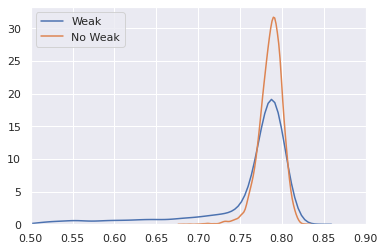

In [162]:
compare_two_distributions(
    df,
    df.loc[df["true_weak?"] == True]["acc_test"],
    df.loc[df["true_weak?"] == False]["acc_test"],
    "Weak",
    "No Weak",
)

Weak: 	 2844 	 0.7906751684247538
No Weak: 17008 	 0.7742921779162747


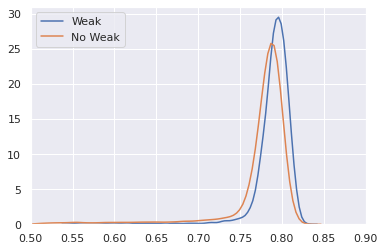

In [163]:
compare_two_distributions(
    df,
    df.loc[df["acc_test_all_better?"] == True]["acc_test"],
    df.loc[df["acc_test_all_better?"] == False]["acc_test"],
    "Weak",
    "No Weak",
)

In [154]:
display(HTML(tabulate(table[0:100], headers="keys", tablefmt="html")))

id,param_list_id,weak?,acc_test_all_better?,true_weak?,interesting?,acc_test_oracle,acc_test,fit_score,fit_time,amount_of_all_labels,amount_of_user_asked_queries,sampling,cluster,with_uncertainty_recommendation,with_cluster_recommendation,uncertainty_recommendation_certainty_threshold,uncertainty_recommendation_ratio,cluster_recommendation_minimum_cluster_unity_size,cluster_recommendation_ratio_labeled_unlabeled,allow_recommendations_after_stop,experiment_run_date
0,86b7c4fbef8226321048a5d3c8802403,True,True,True,True,0.824507,0.829007,0.875396,21.1925,224,210,uncertainty_max_margin,dummy,False,True,0.9,0.01,0.85,0.6,True,2020-05-28 11:26:00.174631
1,22d96ff18921c1ba70deb8c29c251a76,False,False,False,False,0.832122,0.828314,0.87501,16.0198,214,210,uncertainty_max_margin,dummy,False,False,0.89,1e-06,0.88,0.82,True,2020-05-28 16:06:31.307841
2,441cee12ff1a846377ac3676d676be90,False,False,False,False,0.828314,0.826584,0.874043,18.566,214,210,uncertainty_max_margin,dummy,True,False,0.98,0.01,0.8,0.79,True,2020-05-28 15:34:39.763004
3,80bd803ab28d606ef02d1e3079be6577,False,True,False,False,0.819315,0.826584,0.874043,16.0224,214,210,uncertainty_max_margin,dummy,True,True,0.87,1e-05,0.98,0.73,True,2020-05-28 13:58:34.045357
4,89aca6bc2c6b7de40ef85560101b8048,False,False,False,False,0.823468,0.823468,0.872299,17.8942,214,210,uncertainty_max_margin,dummy,True,False,0.92,0.01,0.89,1,True,2020-05-28 09:17:21.139455
5,301ef9fa361fef2436ce2605eafccf9e,False,False,False,False,0.824161,0.823468,0.872299,15.9817,214,210,uncertainty_max_margin,dummy,False,False,0.88,1e-05,0.77,0.66,True,2020-05-28 10:33:06.412298
6,dfe7be7331f79b3e0fa8deae49db2354,False,False,False,False,0.824161,0.822776,0.87191,16.6183,214,210,uncertainty_max_margin,dummy,False,True,0.95,0.001,0.59,0.95,True,2020-05-28 12:52:41.596673
7,4a011d11c5c07b88ad4e4872283289a0,True,True,True,True,0.818968,0.821738,0.871327,22.8196,222,210,uncertainty_max_margin,dummy,True,True,0.96,1e-05,0.8,0.93,True,2020-05-28 13:10:38.942410
8,2ce0740f9cf8668cd523ae379926cb07,False,True,False,False,0.817238,0.821738,0.871327,15.2566,214,210,uncertainty_max_margin,dummy,False,False,0.97,0.0001,0.97,0.64,True,2020-05-28 11:27:34.358774
9,66ac40ff034c31474a810a79d7a6de68,False,False,False,False,0.821738,0.821391,0.871132,15.2211,214,210,uncertainty_max_margin,dummy,False,False,0.95,1e-06,0.81,0.54,True,2020-05-28 16:03:45.329047
